In [2]:
import csv
import numpy as np
from matplotlib import pyplot as plt
import os
os.chdir('Data')

In [3]:
def getData():
        with open("data.csv", 'r') as file:
            read = csv.reader(file)
            data = [i for i in read]
        return data

In [4]:
data = np.array(getData()[1:-16])
rotData = np.array([i for i in zip(*data)])
sepData = np.array([data[91*8*i:91*8*(i+1)] for i in range(6)])
rotSepData = [[i for i in zip(*j)] for j in sepData]

In [5]:
titles = [getData()[0][i] for i in range(len(getData()[0]))]
[str(i)+ ":" +getData()[0][i] for i in range(len(getData()[0]))]

['0:Segment',
 '1:Product',
 '2:Date',
 '3:Quantity',
 '4:Unique Purchases',
 '5:Avg. Price',
 '6:Product Revenue',
 '7:Avg. QTY',
 '8:Redistributed Price',
 '9:Days since Day 1']

In [6]:
def clean(dat):
    data = []
    for i in dat:
        try:
            data.append(float(i))
        except: pass
    return data

In [116]:
for i in rotSepData:
    print(i[2][0],'-', i[2][-1])
    print("Mean:",np.mean(clean(i[3])))
    print("SDev:",np.std(clean(i[3])))
    print()

01/12/2015 - 29/02/2016
Mean: 5.4793956044
SDev: 12.9699404655

01/03/2016 - 30/05/2016
Mean: 3.08379120879
SDev: 5.86733937497

31/05/2016 - 29/08/2016
Mean: 4.62637362637
SDev: 11.693097759

30/08/2016 - 28/11/2016
Mean: 3.53708791209
SDev: 15.7777750309

29/11/2016 - 27/02/2017
Mean: 3.35851648352
SDev: 21.0135823161

28/02/2017 - 29/05/2017
Mean: 3.72527472527
SDev: 7.31428067875



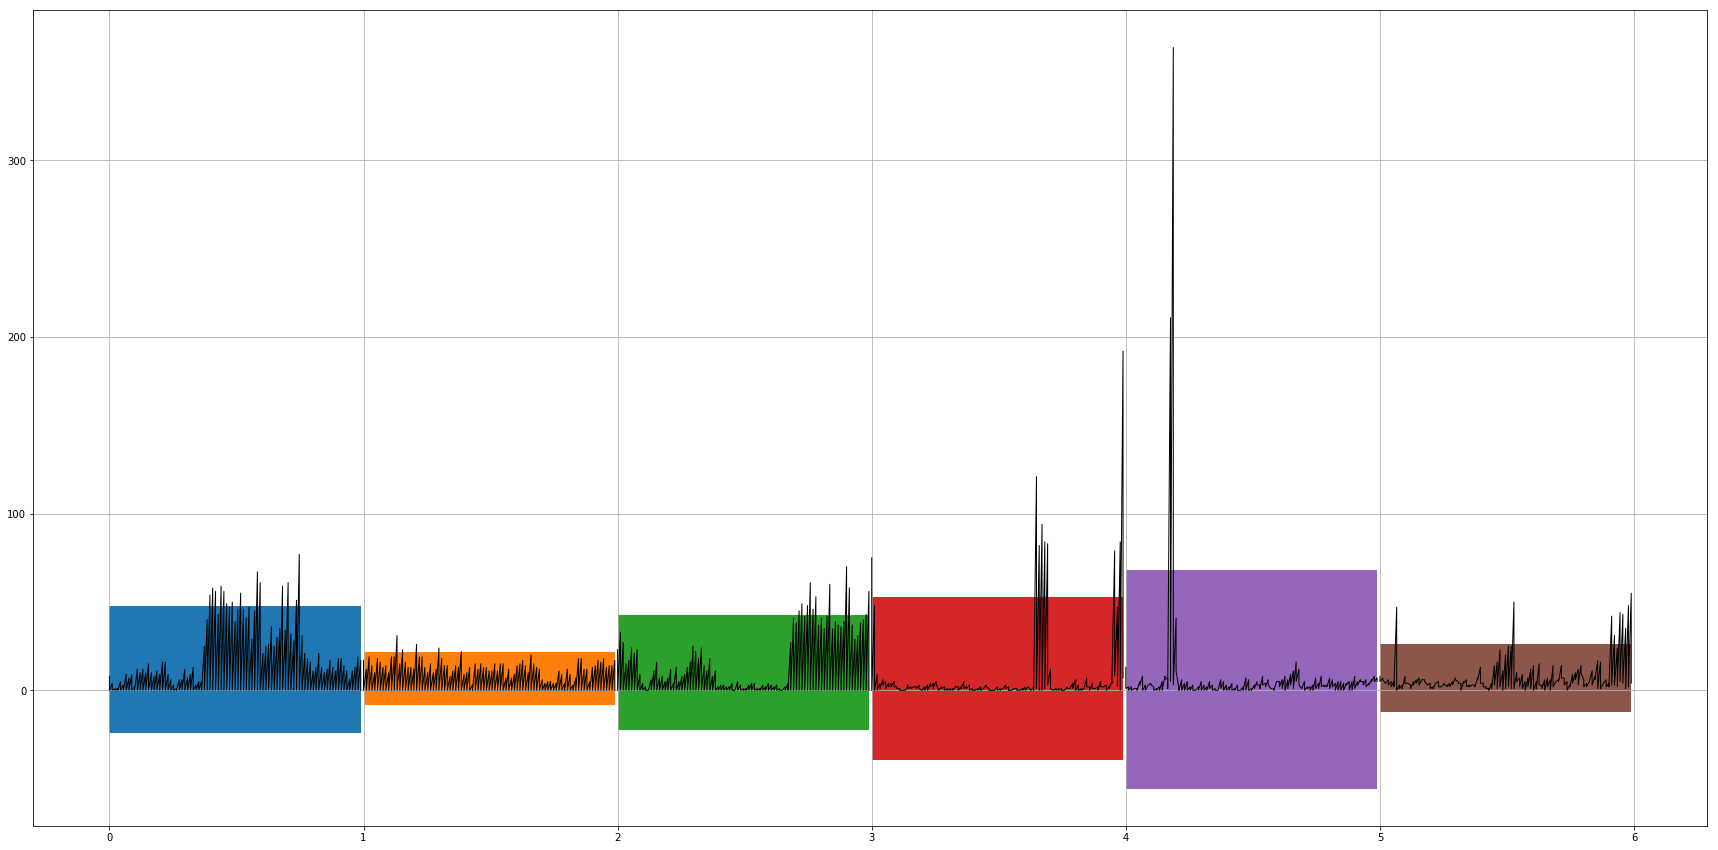

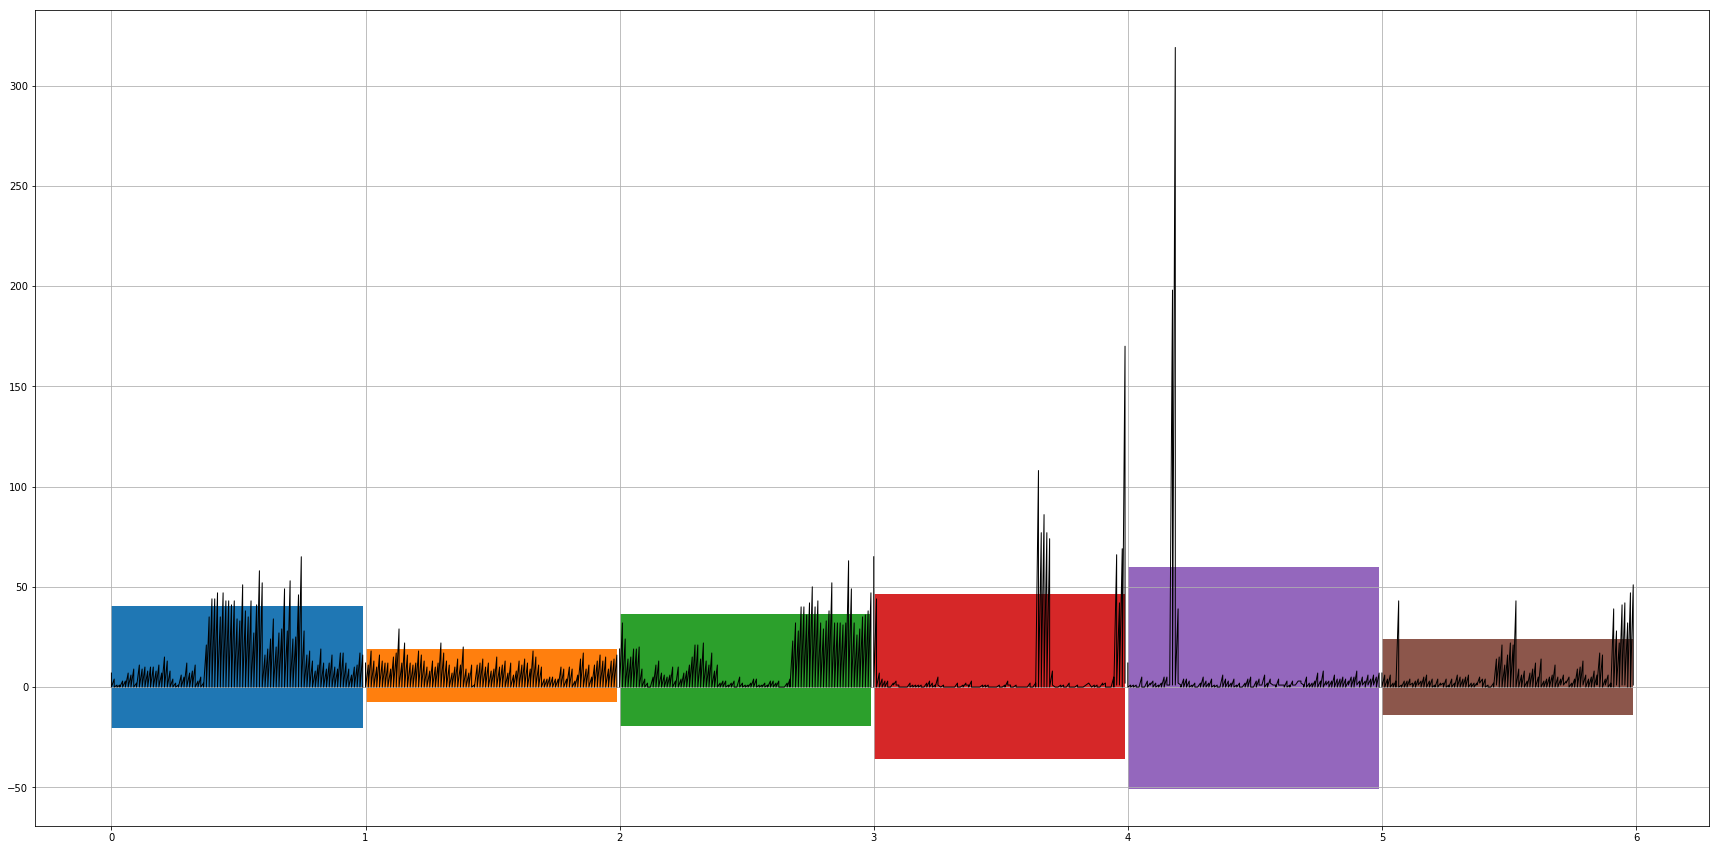

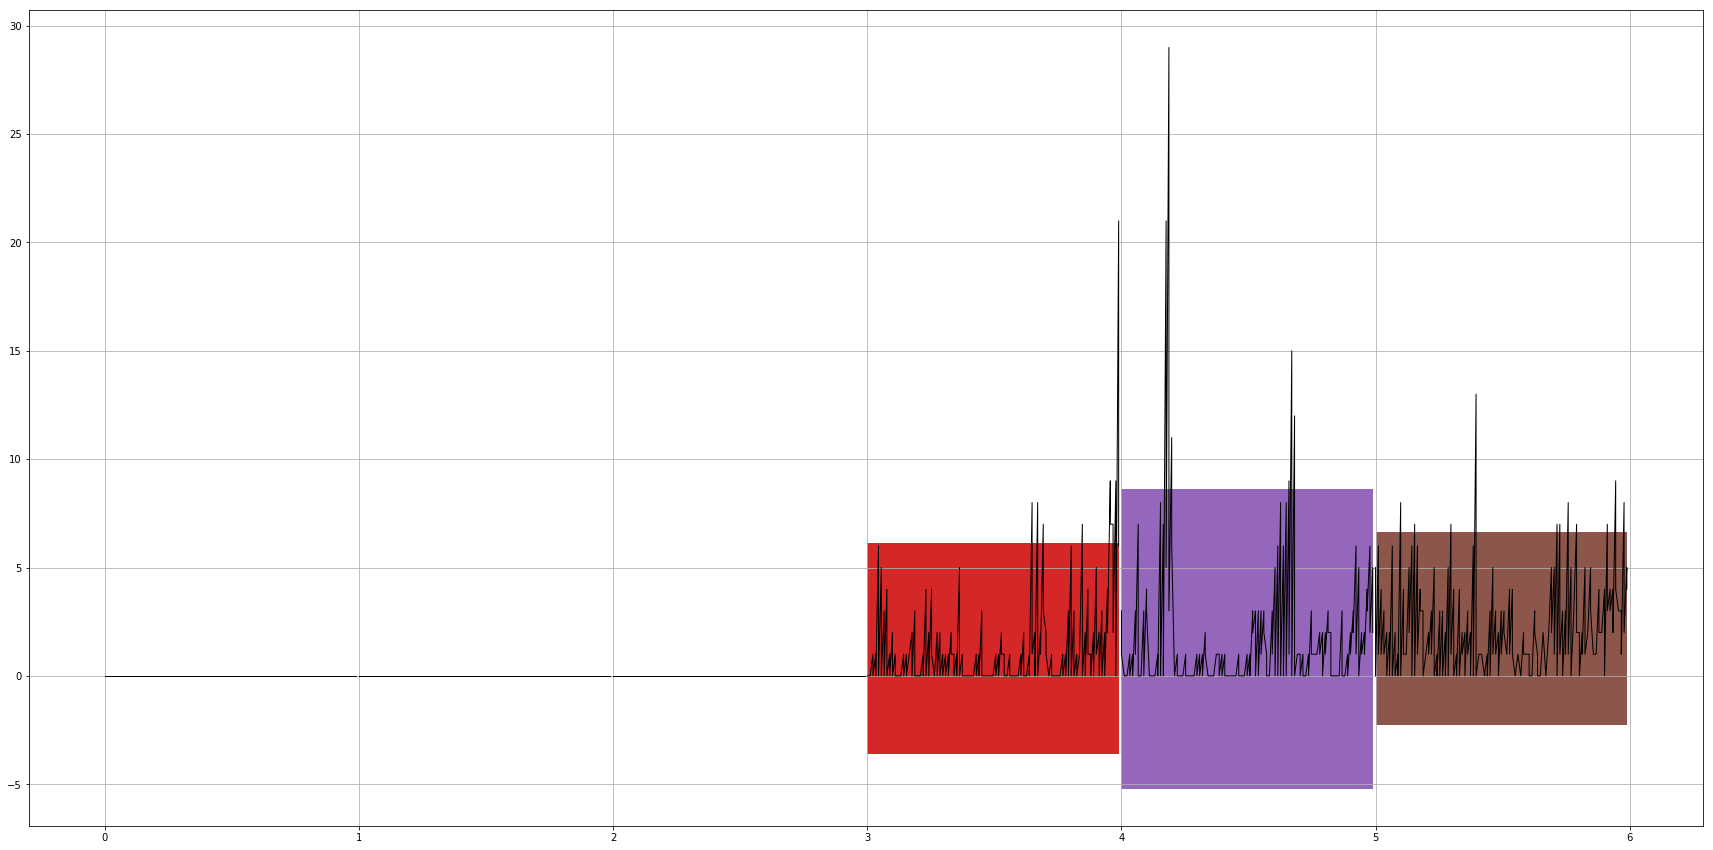

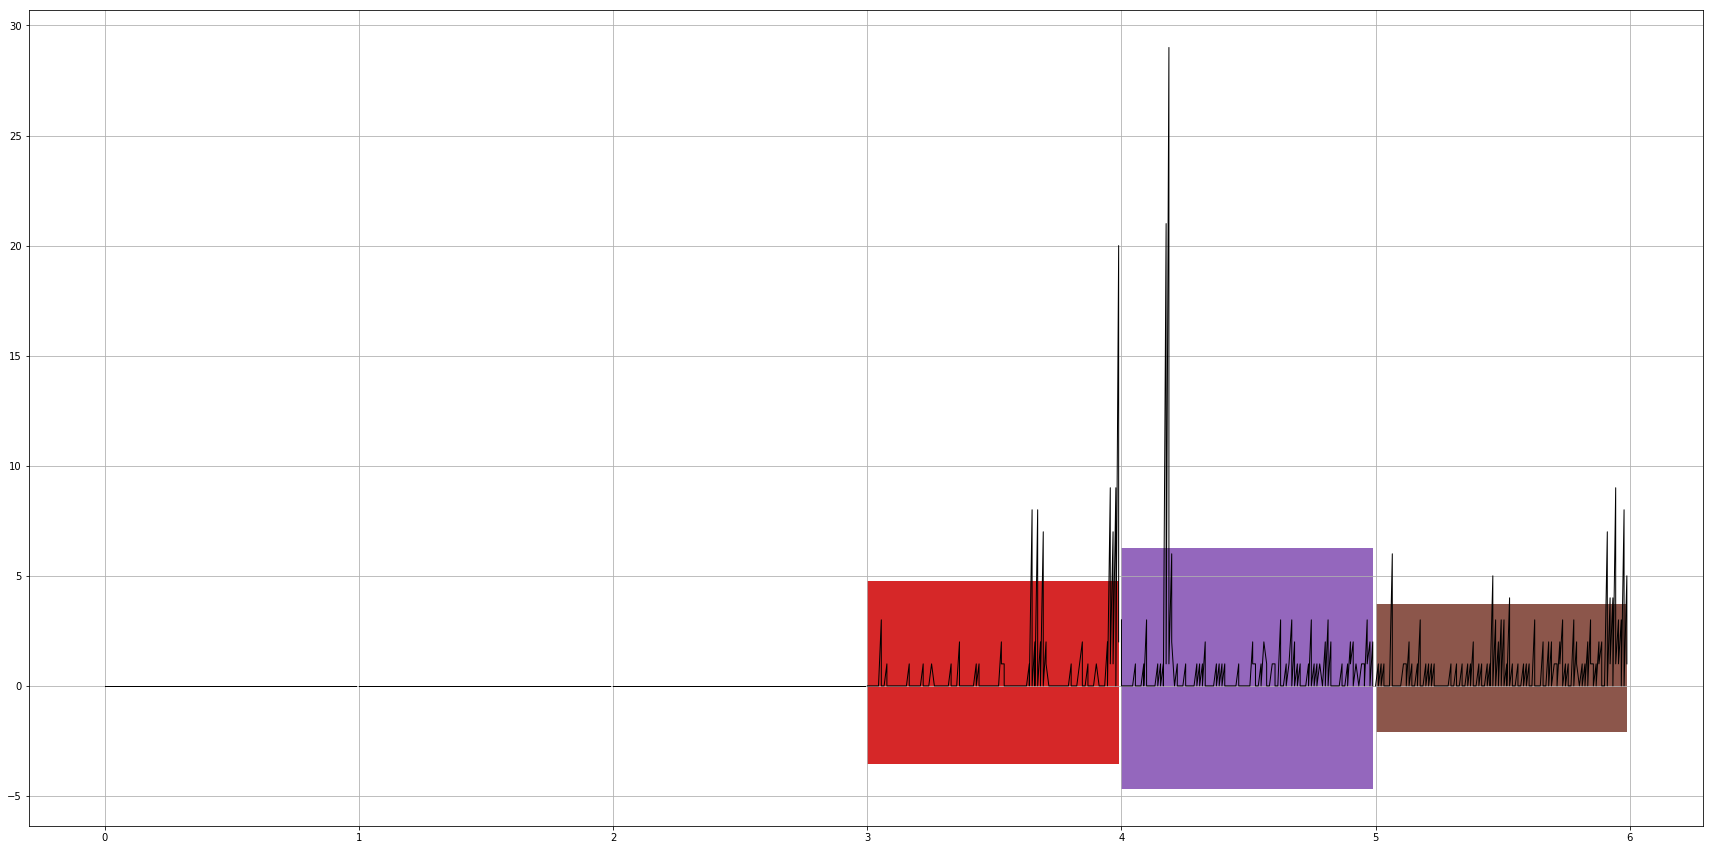

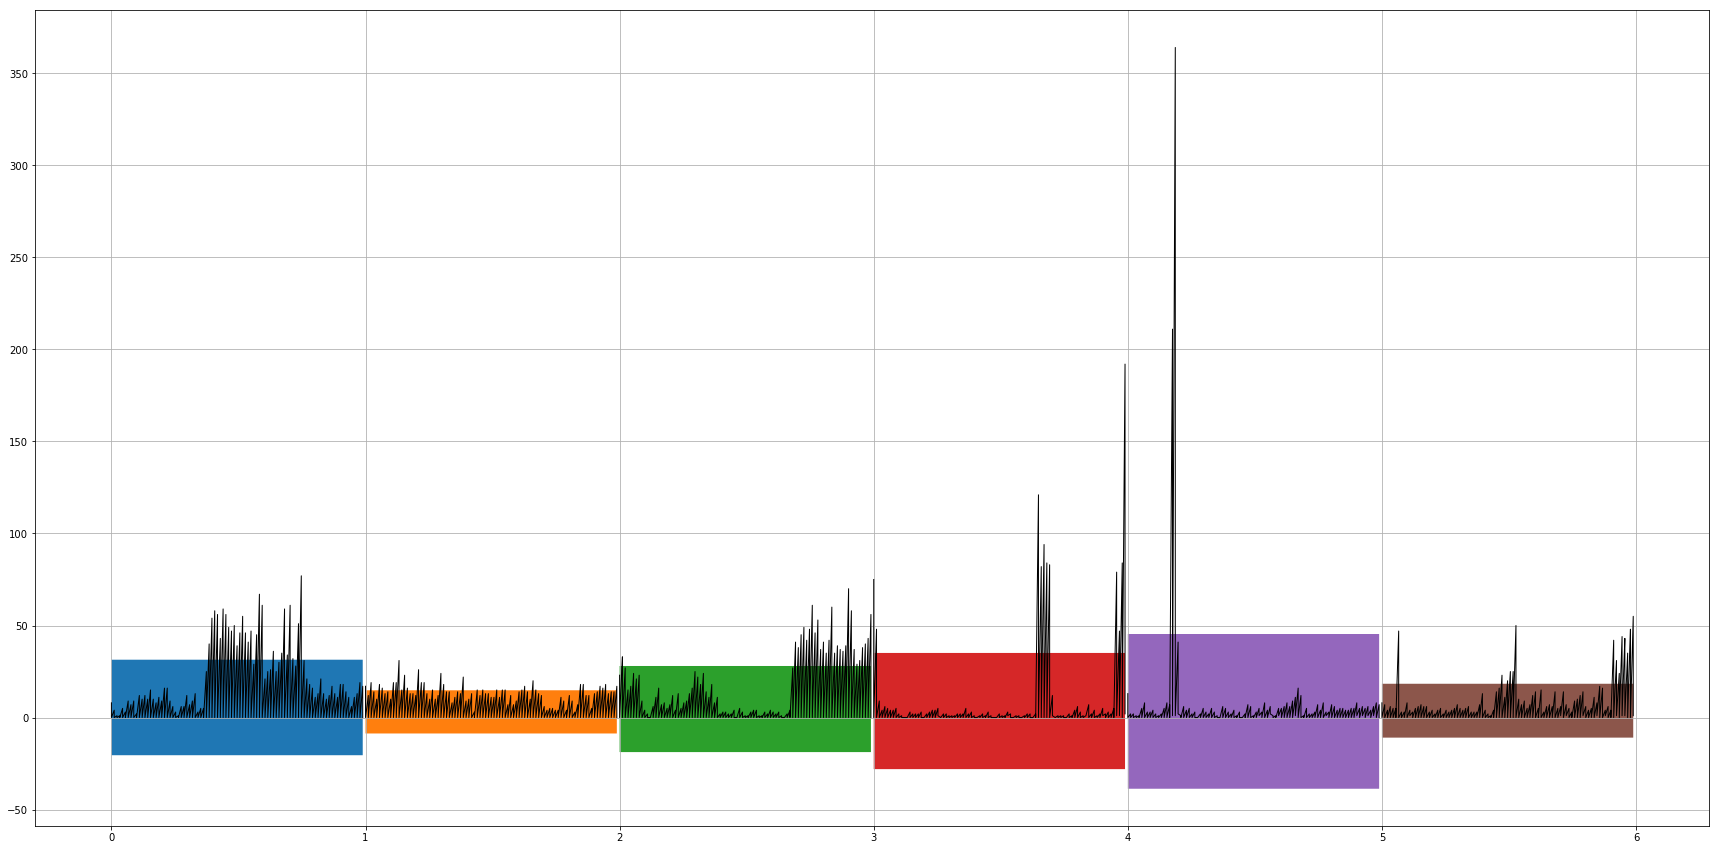

In [176]:
fig=[]
col = 3
for k in rotColSepData:
    fig.append(plt.figure(figsize=[30,15]))
    ax=fig[-1].gca()
    for i in k:
        mean = np.mean(clean(i[col]))
        stdv = np.std(clean(i[col]))
        a1,a2 = [mean-stdv*2]*len(i[col]),[mean+stdv*2]*len(i[col])
        ax.plot([int(j)/91 for j in i[9]],i[col],"k",linewidth=1)
        ax.fill_between([int(j)/91 for j in i[9]], a1, a2)
    ax.grid()
plt.show()
for i in fig: plt.close(i)

In [175]:
wSepData = [[j for j in i if j[0] == "W"] for i in sepData]
xSepData = [[j for j in i if j[0] == "X"] for i in sepData]
ySepData = [[j for j in i if j[0] == "Y"] for i in sepData]
zSepData = [[j for j in i if j[0] == "Z"] for i in sepData]
rotWSepData = [[i for i in zip(*j)] for j in wSepData]
rotXSepData = [[i for i in zip(*j)] for j in xSepData]
rotYSepData = [[i for i in zip(*j)] for j in ySepData]
rotZSepData = [[i for i in zip(*j)] for j in zSepData]
colSepData = [wSepData, xSepData, ySepData, zSepData, sepData]
rotColSepData = [rotWSepData, rotXSepData, rotYSepData, rotZSepData, rotSepData]

In [71]:
def getOutliers(column, rotData, stLevel=2, silent=False):
    dev, mean = stDev(column, rotData), getMean(column, rotData)
    title = getData()[0][column]
    outliers = []
    if not silent:
        print("Outliers in:", title,
              "\nMean:",round(mean,3),"Standard Deviation:",round(dev,3),
              "\nUpper bound:",round(dev*stLevel+mean,3),"Lower bound:",round(-dev*stLevel+mean,3))
    for i in range(len(rotData[column])):
        if -dev*stLevel > rotData[column][i].astype(float) - mean:
            if not silent:
                print("Lower outlier found, Row:{:>4}, Value: {:<10}".format(i,rotData[column][i]))
            outliers.append(i)
        elif rotData[column][i].astype(float) - mean > dev*stLevel:
            if not silent:
                print("Higher outlier found, Row:{:>4}, Value: {:<10}".format(i,rotData[column][i]))
            outliers.append(i)
    
    adjMean = adjustedMean(column,rotData,outliers)
    if not silent:
        print("Mean without outliers:",round(adjMean,3))
    return outliers,adjMean
o=getOutliers(3,rotData,2,silent=True)

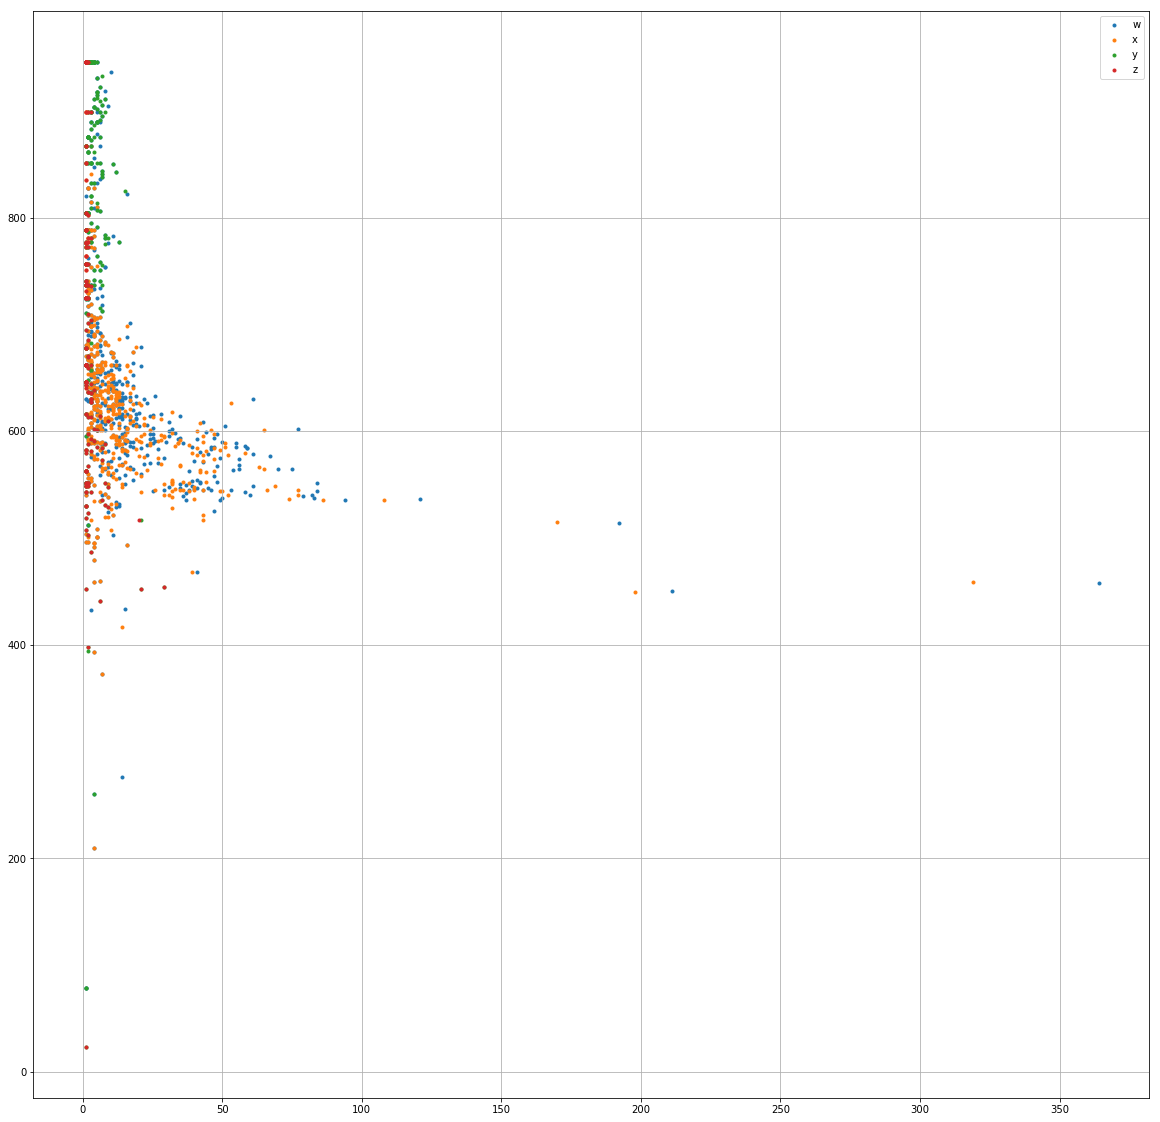

In [7]:
fig = plt.figure(figsize=[20,20])
ax = fig.gca()
x={'w':[],'x':[],'y':[],'z':[]}
y={'w':[],'x':[],'y':[],'z':[]}
for i in range(len(rotData[8])):
    if rotData[8][i] != "N/A":
        x[rotData[0][i].lower()].append(rotData[8][i])
        y[rotData[0][i].lower()].append(rotData[3][i])
for i in ['w','x','y','z']:
    ax.scatter(y[i],x[i],label=i,marker='.')
ax.legend()
ax.grid()
plt.show()